# Project: TMDB Data Analysis
> The motive of this project is to explore a dataset and perform data analysis using pandas and matplotlib. This is spread over four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
### Dataset
- I have chosen the TMDb movie data set for this project of investigating a dataset. This data set contains information for about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I am now going to try and find meaningful insights from this set of data.
<br>

### Questions:
1.  In which year were the highest number of movies released?
2.  Movies of which Genre were released the most?
3.  Which Actor had the most number of movies released?


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> In this section I will be exploring the dataset further to understand the quality of data and determine what actions would be required in order to prepare this data for answering the questions about the dataset.
> #### Observations:
1. The datset contains duplicate entries, missing values and a column release_date with an incorrect datatype. 
2. There are also some columns in the data set which are of no use to answer the above questions. 
3. The genres column for every movie has multiple values separated by a '|' which may need to be split (exploded) into multiple rows so as to perform data analysis more effectively.

### General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
df.shape

(10866, 21)

In [10]:
df.duplicated().sum()

1

In [11]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df['genres'].value_counts()

Drama                                              712
Comedy                                             712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
Comedy|Romance                                     268
Horror|Thriller                                    259
Horror                                             253
Comedy|Drama|Romance                               222
Drama|Thriller                                     138
Comedy|Family                                      102
Action|Thriller                                    101
Thriller                                            93
Drama|Comedy                                        92
Animation|Family                                    90
Crime|Drama|Thriller                                81
Crime|Drama                                         74
Comedy|Horror                                       72
Drama|Come

### Data Cleaning (Preparing the data for analysis)
> #### In this section I will be:
1. Removing duplicate entries from the dataset
2. Changing format of release_date column as datetime
3. Removing missing values from the dataset
4. Exploding entries in genres column into multiple rows so that I am able to group data by genres column to answer the question.

**1. Removing Duplicate Entries:**

In [13]:
# Dropped duplicate entries
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

**2. Changing format of release_date column as datetime:**

In [14]:
# release_date column is an object.
#converted release_date as timestamp
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

**3. Removing missing values from the dataset:**

In [15]:
#Drop all the missing values
df.dropna(inplace = True)
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
#Double check for any missing values
df.isnull().sum().any()

False

**4. Exploding entries in genres column into multiple rows:**

In [17]:
# genres column contains multiple values separated by '|'
# creating a new dataframe with all entries having multiple genre values
hybrids = df[df['genres'].str.contains('|')]
hybrids

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar An

In [18]:
# Need to Explode these values into multiple cells
# Creating a new dataframe from the series with id as the index
new_df = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.id).stack()
new_df.head()

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
dtype: object

In [19]:
# We now want to get rid of the secondary index
# To do this, we will make id as a column (as it can't be an index since the values will be duplicate)
new_df = new_df.reset_index([0, 'id'])
new_df.head()

,id,0
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [20]:
# Will now set the column names as before:
new_df.columns = ['id', 'genres']
new_df.head()

,id,genres
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [21]:
# Megre this to the original dataframe using full outer join:
clean_df = pd.merge(df, new_df, on = 'id', how = 'outer')
clean_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres_x,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_y
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [22]:
#Drop the original genres column
clean_df.drop('genres_x', axis =1, inplace = True)
clean_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_y
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [23]:
#Rename the new genres column from new_df:
clean_df.rename(columns = {'genres_y' : 'genres'}, inplace = True)
clean_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action


In [24]:
clean_df.shape

(5123, 21)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: In which year were the highest number of movies released?

In [26]:
#Group by release year to get the count of movies released:
yearly_count=clean_df.groupby('release_year').count()['id']
yearly_count.tail(20)

release_year
1996     49
1997     26
1998     30
1999     59
2000     55
2001     53
2002     89
2003     99
2004    133
2005    193
2006    247
2007    361
2008    360
2009    488
2010    519
2011    534
2012    375
2013    326
2014    358
2015    415
Name: id, dtype: int64

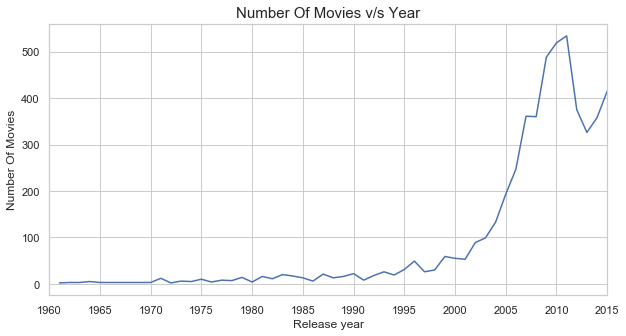

In [28]:
#Plot the count of movies released against year:
yearly_count.plot(xticks = np.arange(1960,2016,5))
#set the title and axis labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number Of Movies v/s Year",fontsize = 15)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)
sns.set_style("whitegrid")

> **From the above plot I can conclude that year 2011 had the highest number of releases (534) followed by year 2010 with 519 releases and year 2009 with 488 releases.**


### Research Question 2:  Movies of which Genre were released the most?

In [70]:
#Get the count of movies by movie:
genre_count = clean_df.groupby('genres').id.nunique()
genre_count.sort_values(ascending = False, inplace = True) 
genre_count

genres
Drama              838
Comedy             640
Thriller           575
Action             532
Adventure          361
Science Fiction    291
Romance            291
Horror             273
Crime              262
Family             233
Fantasy            202
Animation          170
Mystery            148
Documentary         93
Music               72
History             56
War                 44
Western             20
TV Movie            16
Foreign              6
Name: id, dtype: int64

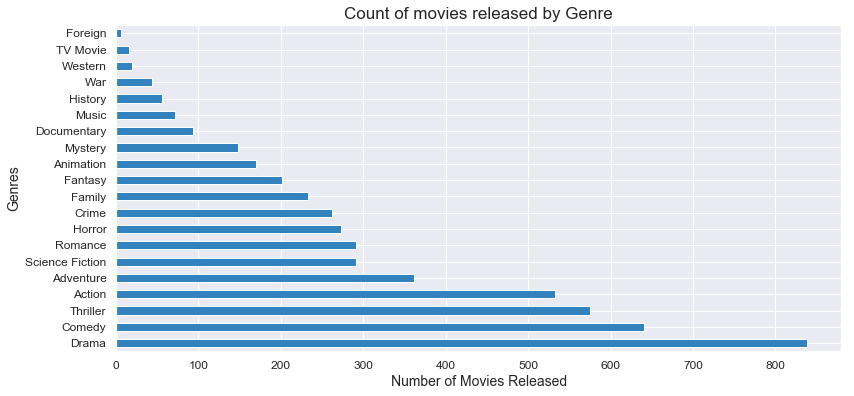

In [68]:
#plot a horizontal bar plot using plot function:
genre_count.plot(kind= 'barh',figsize = (13,6),fontsize=12)

#set the title and axis labels:
plt.title("Count of movies released by Genre",fontsize=17)
plt.xlabel('Number of Movies Released',fontsize=14)
plt.ylabel("Genres",fontsize= 14)
sns.set_style("darkgrid")

> **From the above plot we can see that the highest number of movies released belonged to the genre Drama (838).**

### Reasearch Question 3: Which Actor had the most number of movies released?

In [73]:
#Splitting multiple values in actor column into a series to count
cast_split = clean_df['cast'].str.cat(sep = '|')
data = pd.Series(cast_split.split('|'))
actor_count = data.value_counts(ascending=False)
actor_count.head()

Matt Damon           66
Ryan Reynolds        58
Mark Wahlberg        55
Samuel L. Jackson    54
Nicolas Cage         53
dtype: int64

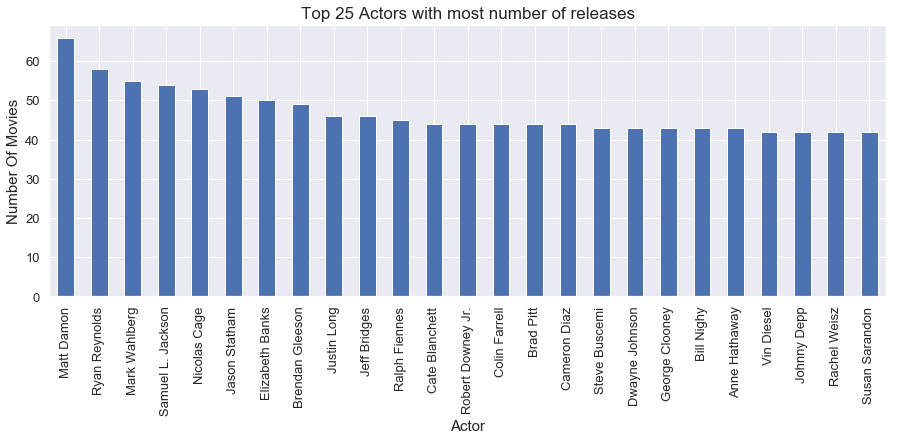

In [82]:
#plot a bar graph
actor_count.iloc[:25].plot(kind = 'bar', figsize=(15,5),fontsize=13)

#setup the title and the labels of the plot.
plt.title("Top 25 Actors with most number of releases",fontsize=17)
plt.xlabel('Actor',fontsize=15)
plt.ylabel("Number Of Movies",fontsize= 15)
sns.set_style("darkgrid")

> **From the above plot we can see that Matt Damon was the actor with highest number (66) releases**

<a id='conclusions'></a>
## Conclusions

> 
- Year 2011 had the highest number of releases followed by year 2010 and year 2009.
- Drama is the most released genre of all time, followed by comedy, thriller and action.
- Matt Damon was the actor with most number of movies followed by Ryan Reynolds and Mark Wahlberg.

    
>Note: The above findings are only approximate as we had dropped off entries with missing values which might have resulted in some of the movies not being considered in the above analysis.